In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly
import plotly.express as px

In [3]:
df18to21 = pd.read_csv('df18to21H.csv',index_col=0)
df18to21.head()

,Unnamed: 0,TOTPRISN,SENTYR,SENTIMP,RANGEPT,PRISDUM,PCNTDEPT,MNTHDEPT,NUMDEPEN,NOCOUNTS,...,STATMIN,PRESENT,MONSEX,OFFGUIDE,CHP3CHG1,CHP3CHG2,CHP3CHG3,CHP3CHG4,CHP3CHG5,CHP3CHG6
0,0,172,2017,1,NaN,1,8.510638,16.0,2.0,1,...,60.0,1.0,0.0,10,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,2017,1,2.0,1,NaN,NaN,1.0,1,...,0.0,1.0,1.0,17,NaN,NaN,NaN,NaN,NaN,NaN
2,2,6,2017,1,NaN,1,40.000000,4.0,1.0,1,...,0.0,1.0,0.0,17,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4,2017,1,NaN,1,50.000000,4.0,2.0,1,...,0.0,1.0,0.0,17,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0,2017,1,2.0,1,NaN,NaN,3.0,1,...,0.0,1.0,0.0,17,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df18to21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267815 entries, 0 to 267814
Data columns (total 34 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  267815 non-null  int64  
 1   TOTPRISN    267815 non-null  int64  
 2   SENTYR      267815 non-null  int64  
 3   SENTIMP     267815 non-null  int64  
 4   RANGEPT     124419 non-null  float64
 5   PRISDUM     267815 non-null  int64  
 6   PCNTDEPT    132832 non-null  float64
 7   MNTHDEPT    132832 non-null  float64
 8   NUMDEPEN    238961 non-null  float64
 9   NOCOUNTS    267815 non-null  int64  
 10  MONRACE     267815 non-null  int64  
 11  NEWEDUC     240580 non-null  float64
 12  DISPOSIT    267815 non-null  int64  
 13  CITIZEN     266223 non-null  float64
 14  INOUT       73504 non-null   float64
 15  DISTRICT    267815 non-null  int64  
 16  SENTRNGE    266210 non-null  float64
 17  CRIMHIST    260983 non-null  float64
 18  COMBDRG2    80684 non-null   float64
 19  CA

In [5]:
df18to21 = df18to21.drop(columns=['Unnamed: 0','CHP3CHG1','CHP3CHG2','CHP3CHG3', 'CHP3CHG4', 'CHP3CHG5', 'CHP3CHG6', 'INOUT', 'SENTRNGE', 
                                  'STATMIN', 'STATMAX', 'MNTHDEPT', 'ACCAP'])

Dropped these columns because CHP3CHGX columns contained more than 90% null values and INOUT and SENTRNGE were redundant.

In [6]:
df18to21 = df18to21.drop(df18to21[df18to21['TOTPRISN'] == 9997].index)

Dropped ~30 data values for individuals with unknown sentence lengths

In [7]:
df18to21['SENTYR'].value_counts()

2019    78749
2018    71211
2020    56953
2021    44670
2017    16209
Name: SENTYR, dtype: int64

In [8]:
df18to21 = df18to21.drop(df18to21[df18to21['SENTYR'] == 2017].index)

Dropped 16210 data values from 2017

In [9]:
df18to21.rename(columns= {'TOTPRISN': 'sentence_length', 'SENTYR': 'year_sentenced', 'SENTIMP': 'sentence_type', 'RANGEPT': 'guideline_range', 'PRISDUM': 'imprisoned',
                          'PCNTDEPT': 'guideline_var_pct', 'NUMDEPEN': 'dependents', 'NOCOUNTS': 'count_convictons', 'MONRACE': 'race', 'NEWEDUC': 'education', 
                          'DISPOSIT': 'disposition', 'CITIZEN': 'citizen', 'DISTRICT': 'state', 'CRIMHIST': 'criminal_hist', 'COMBDRG2': 'drug_type', 
                          'CASETYPE': 'case_type', 'AGE': 'age', 'WEAPON': 'weapon','PRESENT': 'presentence_stat', 'MONSEX': 'gender', 'OFFGUIDE': 'crime_type'}, inplace=True
)

In [10]:
df18to21['race'].value_counts()

0     144200
2      49972
1      48131
3       4814
4       3601
7        563
8        198
5         87
10        12
9          5
Name: race, dtype: int64

**Race dictionary**: 

|Column|Value|Description|
|---|---|---|
|**race**|1|White/ Caucasian| 
|**race**|2|Black/ African American| 
|**race**|3|American Indian/ Alaskan Native| 
|**race**|4|Asian or Pacific Islander| 
|**race**|5|Multi- Racial| 
|**race**|7|Other| 
|**race**|8|Unknown| 
|**race**|9|Non- US American Indians| 
|**race**|10|American Indian Citizenship Unknown|

In [11]:
df18to21['race'] = df18to21['race'].replace(10,3)
df18to21['race'] = df18to21['race'].replace(9,3)
df18to21['race'] = df18to21['race'].replace(8,7)
df18to21['race'] = df18to21['race'].replace(5,7)

- Consolidated Non-US American Indians and American Indian Citizenship with American Indian\Alaskan Native
- Consolidated Multiracial and Unknown with Other

In [12]:
df18to21['citizen'].value_counts()

1.0    144630
3.0     94639
2.0      7745
4.0      2019
5.0      1080
Name: citizen, dtype: int64

**Citizen dictionary**: 

|Column|Value|Description|
|---|---|---|
|**citizen**|1|US Citizen| 
|**citizen**|2|Resident/ Legal Alien| 
|**citizen**|3|Illegal Alien| 
|**citizen**|4|Not US Citizen/ Alien Status Unknown| 
|**citizen**|5|Extradited Alien| 

In [13]:
df18to21['citizen'] = [1 if (i == 1) else 0 for i in df18to21['citizen']]

In [14]:
df18to21['dependents'].unique()

array([ 2., nan,  0.,  1.,  5.,  7.,  8.,  4.,  6.,  3., 10., 12.,  9.,
       11., 13., 19., 14., 15., 18., 17., 20., 16., 41., 33., 27., 36.,
       57., 55.])

In [15]:
df18to21['dependents'] = [0 if (i == 0) else 1 for i in df18to21['dependents']]

In [18]:
df18to21['drug_type'] = df18to21['drug_type'].fillna(0)

In [19]:
df18to21['drug_type'].isnull().sum()

0

In [20]:
state_dict = {0:'Maine',1:'Massachusetts',2:'New Hampshire',3:'Rhode Island',4:'Puerto Rico',5:'Connecticut',\
6:'New York',7:'New York',8:'New York',9:'New York',10:'Vermont',11:'Delaware',12:'New Jersey',\
13:'Pennsylvania',14:'Pennsylvania',15:'Pennsylvania',16:'Maryland',17:'North Carolina',18:'North Carolina',\
19:'North Carolina',20:'South Carolina',22:'Virginia',23:'Virginia',24:'West Virginia',25:'West Virginia',\
26:'Alabama',27:'Alabama',28:'Alabama',29:'Florida',30:'Florida',31:'Florida',32:'Georgia',33:'Georgia',\
34:'Georgia',35:'Louisiana',36:'Louisiana',37:'Mississippi',38:'Mississippi',39:'Texas',40:'Texas',41:'Texas',\
42:'Texas',43:'Kentucky',44:'Kentucky',45:'Michigan',46:'Michigan',47:'Ohio',48:'Ohio',49:'Tennessee',50:'Tennessee',\
51:'Tennessee',52:'Illinois',53:'Illinois',54:'Illinois',55:'Indiana',56:'Indiana',57:'Wisconsin',58:'Wisconsin',\
60:'Arkansas',61:'Arkansas',62:'Iowa',63:'Iowa',64:'Minnesota',65:'Missouri',66:'Missouri',67:'Nebraska',\
68:'North Dakota',69:'South Dakota',70:'Arizona',71:'California',72:'California',73:'California',74:'California',\
75:'Hawaii',76:'Idaho',77:'Montana',78:'Nevada',79:'Oregon',80:'Washington',81:'Washington',82:'Colorado',83:'Kansas',\
84:'New Mexico',85:'Oklahoma',86:'Oklahoma',87:'Oklahoma',88:'Utah',89:'Wyoming',90:'District of Columbia',91:'Virgin Islands',\
93:'Guam',94:'North Mariana Islands',95:'Alaska',96:'Louisiana'}

df18to21['state'] = [state_dict.get(i) for i in df18to21['state']]

Replace numeric district with state name

In [21]:
region_dict = {'Connecticut':'Northeast', 'Maine':'Northeast', 'Massachusetts':'Northeast',\
'New Hampshire':'Northeast', 'Rhode Island':'Northeast', 'Vermont':'Northeast',\
'Delaware':'South', 'Maryland':'South', 'New Jersey':'Northeast',\
'New York':'Northeast', 'Pennsylvania':'Northeast','District of Columbia':'South',\
'Alabama':'South', 'Arkansas':'South', 'Florida':'South', 'Georgia':'South', 'Kentucky':'South',\
'Louisiana':'South', 'Mississippi':'South', 'Missouri':'South',\
'North Carolina':'South', 'South Carolina':'South', 'Tennessee':'South',\
'Virginia':'South', 'West Virginia':'South',\
'Illinois':'Midwest', 'Indiana':'Midwest', 'Iowa':'Midwest', 'Kansas':'Midwest',\
'Michigan':'Midwest', 'Minnesota':'Midwest', 'Nebraska':'Midwest',\
'North Dakota':'Midwest', 'Ohio':'Midwest', 'South Dakota':'Midwest', 'Wisconsin':'Midwest',\
'Arizona':'West', 'New Mexico':'West', 'Oklahoma':'South', 'Texas':'South',\
'Alaska':'West', 'California':'West', 'Colorado':'West', 'Hawaii':'West',\
'Idaho':'West', 'Montana':'West', 'Nevada':'West', 'Oregon':'West', 'Utah':'West',\
'Washington':'West', 'Wyoming':'West'}

df18to21['region'] = [region_dict.get(i) for i in df18to21['state']]

Categorize states to respective regions and add column for analysis

In [22]:
df18to21 = df18to21[df18to21['region'].notnull()]

In [23]:
df18to21['college'] = [1 if (i == 5) or (i == 6) else 0  for i in df18to21['education']]
df18to21.drop(columns=['education'])

,sentence_length,year_sentenced,sentence_type,guideline_range,imprisoned,guideline_var_pct,dependents,count_convictons,race,disposition,...,criminal_hist,drug_type,case_type,age,weapon,presentence_stat,gender,crime_type,region,college
12990,188,2018,1,1.0,1,NaN,1,1,0,3,...,1.0,3.0,1.0,24.0,0,1.0,0.0,10,West,0
14616,0,2018,1,NaN,1,NaN,1,1,0,1,...,1.0,0.0,NaN,28.0,0,1.0,0.0,17,South,0
14617,300,2018,1,6.0,1,NaN,1,3,0,3,...,1.0,6.0,1.0,41.0,1,1.0,0.0,10,Midwest,0
14619,63,2018,1,1.0,1,NaN,0,1,2,1,...,1.0,0.0,1.0,25.0,1,1.0,0.0,26,South,0
14620,0,2018,1,2.0,1,NaN,1,1,0,1,...,1.0,0.0,1.0,27.0,0,1.0,0.0,17,West,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267809,0,2021,4,NaN,0,100.00,0,1,1,1,...,1.0,4.0,1.0,76.0,0,2.0,0.0,10,Northeast,1
267810,132,2021,1,NaN,1,2.22,0,2,0,1,...,1.0,0.0,1.0,28.0,1,1.0,0.0,26,Northeast,1
267812,372,2021,1,NaN,1,NaN,0,2,2,1,...,1.0,0.0,1.0,26.0,1,1.0,0.0,22,Northeast,0
267813,216,2021,2,NaN,1,5.53,0,1,1,1,...,1.0,0.0,1.0,42.0,0,1.0,0.0,27,West,0


In [24]:
df18to21['white'] = [1 if (i == 1) else 0  for i in df18to21['race']]

In [25]:
df18to21_cleaned = df18to21.copy(deep=True)

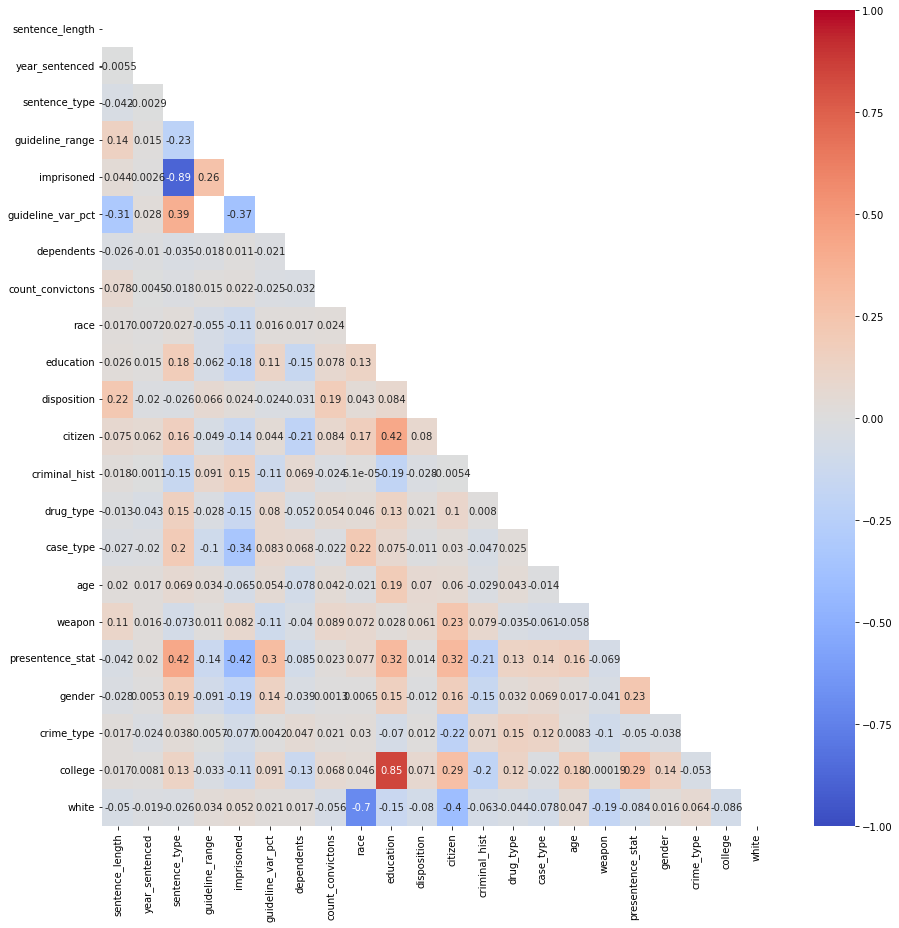

In [22]:
plt.figure(figsize=(15,15))
sns.heatmap(df18to21_cleaned.corr(),vmin=-1, vmax= 1, annot=True, cmap='coolwarm', mask= np.triu(df18to21_cleaned.corr()));

In [26]:
population18_20 = pd.read_csv('https://www2.census.gov/programs-surveys/popest/datasets/2010-2020/national/totals/nst-est2020-popchg2010-2020.csv')
population18_20 = population18_20[['NAME', 'POPESTIMATE2018', 'POPESTIMATE2019','POPESTIMATE2020']]
population18_20.rename(columns={'NAME': 'name', 'POPESTIMATE2018': 2018, 'POPESTIMATE2019': 2019, 'POPESTIMATE2020': 2020}, inplace=True)
population18_20.head(2)

,name,2018,2019,2020
0,United States,326838199,328329953,329484123
1,Northeast Region,56084543,56002934,55849869


In [29]:
population21 = pd.read_csv('PEPPOP2021.NST_EST2021_POP-2022-05-11T014539.csv')
population21.drop(columns=['Estimates Base Population, April 1, 2020 (POP_BASE2020)',
                           'Population Estimate, July 1, 2020 (POP_2020)'], inplace=True)
population21.rename(columns={'Population Estimate, July 1, 2021 (POP_2021)': 2021, 'Geographic Area Name (NAME)': 'name'}, inplace=True)
population21.head(2)

,name,2021
0,United States,"331,893,745"
1,South Region,"127,225,329"


In [30]:
population = pd.merge(left=population18_20, right=population21, left_on='name', right_on='name')
population.drop([56], inplace=True)
population.head(2)

,name,2018,2019,2020,2021
0,United States,326838199,328329953,329484123,"331,893,745"
1,Northeast Region,56084543,56002934,55849869,"57,159,838"


In [36]:
#population[2021] = population[2021].str.replace(',','').astype(int)
#population.set_index('name',inplace=True)
population['average'] = population.mean(axis=1)
population = population.rename(index={'South Region': 'South', 'Northeast Region': 'Northeast', 'Midwest Region': 'Midwest',
                              'West Region': 'West'})
population.to_csv('population.csv')

In [37]:
population

,2018,2019,2020,2021,average
name,,,,,
United States,326838199,328329953,329484123,331893745,3.291365e+08
Northeast,56084543,56002934,55849869,57159838,5.627430e+07
Midwest,68263019,68340091,68316744,68841444,6.844032e+07
South,124649156,125686544,126662754,127225329,1.260559e+08
West,77841481,78300384,78654756,78667134,7.836594e+07
Alabama,4891628,4907965,4921532,5039877,4.940250e+06
Alaska,736624,733603,731158,732673,7.335145e+05
Arizona,7164228,7291843,7421401,7276316,7.288447e+06
Arkansas,3012161,3020985,3030522,3025891,3.022390e+06


In [38]:
pop_dict = dict(zip(population.index,population['average']))
state_count = df18to21_cleaned.groupby('state')['year_sentenced'].count().reset_index()
state_count_dict = dict(zip(state_count['state'],state_count['year_sentenced']))
df_pop = pd.DataFrame()
df_pop['state'] = df18to21_cleaned['state'].unique()
df_pop['state_count'] = [state_count_dict.get(i) for i in df_pop['state']]
df_pop['population'] = [round(pop_dict.get(i)) for i in df_pop['state']]
df_pop['perc_charged'] = (df_pop['state_count'] / df_pop['population'])*100
state_percent_dict = dict(zip(df_pop['state'],df_pop['perc_charged']))
df18to21_cleaned['perc_charged'] = [state_percent_dict.get(i) for i in df18to21['state']]

In [39]:
df18to21_cleaned.to_csv('df18to21_cleanedH.csv')

In [40]:
df18to21_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247533 entries, 12990 to 267814
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   sentence_length    247533 non-null  int64  
 1   year_sentenced     247533 non-null  int64  
 2   sentence_type      247533 non-null  int64  
 3   guideline_range    114560 non-null  float64
 4   imprisoned         247533 non-null  int64  
 5   guideline_var_pct  123186 non-null  float64
 6   dependents         247533 non-null  int64  
 7   count_convictons   247533 non-null  int64  
 8   race               247533 non-null  int64  
 9   education          222062 non-null  float64
 10  disposition        247533 non-null  int64  
 11  citizen            247533 non-null  int64  
 12  state              247533 non-null  object 
 13  criminal_hist      241355 non-null  float64
 14  drug_type          247533 non-null  float64
 15  case_type          242936 non-null  float64
 16

Strategy for dealing with null values: 

- 'guideline_range' - no need to impute
- 'guideline_var_pct' - no need to impute
- 'criminal_hist' - impute with mode
- 'case_type' - impute with mode
- 'age' - impute with mean
- 'presentence_stat' - no need to impute
- 'gender' - impute with mode

In [46]:
df18to21_cleaned.columns

Index(['sentence_length', 'year_sentenced', 'sentence_type', 'guideline_range',
       'imprisoned', 'guideline_var_pct', 'dependents', 'count_convictons',
       'race', 'education', 'disposition', 'citizen', 'state', 'criminal_hist',
       'drug_type', 'case_type', 'age', 'weapon', 'presentence_stat', 'gender',
       'crime_type', 'region', 'college', 'white', 'perc_charged'],
      dtype='object')

In [66]:
df18to21_2 = pd.read_csv('df18to21_cleaned.csv')

In [67]:
df18to21_2.shape

(247533, 26)

In [68]:
df18to21_cleaned.shape

(247533, 25)

In [69]:
df18to21_cleaned['race'].value_counts()

0    140545
2     49830
1     48076
3      4830
4      3415
7       837
Name: race, dtype: int64

In [70]:
df18to21_2['race'].value_counts()

1    179795
2     54120
3      5329
7      4672
4      3617
Name: race, dtype: int64

In [71]:
df18to21_2['race'] = [i for i in df18to21_cleaned['race']]

In [72]:
df18to21_2['race'].value_counts(normalize=True)

0    0.567783
2    0.201306
1    0.194221
3    0.019513
4    0.013796
7    0.003381
Name: race, dtype: float64

In [76]:
df18to21_2['white'] = [1 if i == 1 else 0 for i in df18to21_2['race']]

In [77]:
df18to21_2['white'].value_counts(normalize=True)

0    0.805779
1    0.194221
Name: white, dtype: float64

In [78]:
df18to21_2.to_csv('df18to21_cleanedH.csv')

In [79]:
df18to21_cleancap = df18to21_2.copy()

In [80]:
df18to21_cleancap['sentence_length'] = [840 if i >= 840 else i for i in df18to21_cleancap['sentence_length']]

In [81]:
df18to21_cleancap['sentence_length'].max()

840

In [82]:
df18to21_cleancap.to_csv('regression_data.csv')